In [1]:
from neo4j import GraphDatabase

def get_neo4j_driver(uri, user, password) -> GraphDatabase.driver:
    return GraphDatabase.driver(uri, auth=(user, password))

uri = "neo4j+s://9d1381c2.databases.neo4j.io:7687"  # my uri
user = "Wesley"  # my user name
password = "Xlbabv969."  # my password
driver = get_neo4j_driver(uri, user, password)


In [2]:
query = "MATCH (n) RETURN COUNT(n) AS node_count"  # Your query
node_count = 0
with driver.session() as session:
    result = session.run(query)
    for record in result:
        node_count = record["node_count"]  # Extract the node count

print(f"Total number of nodes: {node_count}")

ValueError: Cannot resolve address 9d1381c2.databases.neo4j.io:7687

In [39]:
from neo4j import GraphDatabase
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def get_flavour_types(tx):
    
    result = tx.run("MATCH (n:TasteProfile) RETURN DISTINCT n.flavour AS FlavourType")
    return [record["FlavourType"] for record in result]


with driver.session() as session:
    flavour_types = session.read_transaction(get_flavour_types)



fig = make_subplots()


for i, flavour in enumerate(flavour_types):
    fig.add_trace(go.Bar(x=[i], y=[flavour], orientation='h'))


fig.update_layout(
    
    yaxis={
        'type': 'category',
        'autorange': True
    },
    xaxis={
        'visible': False
    },
    title_text="Flavour Types in Products",
    margin=dict(l=0, r=0, t=30, b=0)
)


fig.show()


C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\1590814220.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.

C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\1590814220.py:13: DeprecationWarning:

read_transaction has been renamed to execute_read



In [8]:
from neo4j import GraphDatabase
import plotly.express as px


# function executes the query and returns the data
def get_sweet_flavours(tx):
    result = tx.run("MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:HAS_TASTE_PROFILE]->(t:TasteProfile) "
                    "WHERE toLower(t.flavour) CONTAINS 'sweet' OR toLower(t.Flavour) CONTAINS 'sweet' "
                    "RETURN p.name AS ProductName, t.flavour AS Flavour, t.Flavour AS FlavourCapital")
    return [{'ProductName': record['ProductName'], 'Flavour': record['Flavour'] or record['FlavourCapital']} for record in result]

with driver.session() as session:
    sweet_flavours_data = session.read_transaction(get_sweet_flavours)

# Close the database connection
driver.close()

# Visualisation with Plotly
fig = px.bar(sweet_flavours_data, x='ProductName', y='Flavour',
             title='Products with Sweet Flavour Profiles')
fig.show()


C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\476543936.py:13: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.

C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\476543936.py:14: DeprecationWarning:

read_transaction has been renamed to execute_read



In [9]:
import plotly.express as px

# Assume that sweet_flavours_data is a list of data containing product names and flavours
fig = px.strip(sweet_flavours_data, x='ProductName', y='Flavour', title='Distribution of Sweet Flavours in Products')
fig.show()


In [13]:
import plotly.express as px

# Ensure that sweet_flavours_data is in DataFrame format and contains ProductName and Flavour columns
fig = px.sunburst(sweet_flavours_data, path=['ProductName', 'Flavour'], title='Sunburst Chart of Sweet Flavours')
fig.show()


In [14]:
fig = px.treemap(sweet_flavours_data, path=['ProductName', 'Flavour'], title='Treemap of Sweet Flavours')
fig.show()


In [19]:
from neo4j import GraphDatabase
import plotly.express as px


# function executes the query and returns the data
def get_flavoured_products(tx):
    query = (
        "MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:HAS_TASTE_PROFILE]->(t:TasteProfile) "
        "WITH p, t "
        "WHERE "
        "toLower(t.flavour) CONTAINS 'sweet' OR toLower(t.Flavour) CONTAINS 'sweet' OR "
        "toLower(t.flavour) CONTAINS 'sour' OR toLower(t.Flavour) CONTAINS 'sour' OR "
        "toLower(t.flavour) CONTAINS 'bitter' OR toLower(t.Flavour) CONTAINS 'bitter' OR "
        "toLower(t.flavour) CONTAINS 'spicy' OR toLower(t.Flavour) CONTAINS 'spicy' OR "
        "toLower(t.flavour) CONTAINS 'salt' OR toLower(t.Flavour) CONTAINS 'salt' "
        "RETURN p.name AS ProductName, t.flavour AS Flavour, t.Flavour AS FlavourCapital"
    )
    result = tx.run(query)
    products = {}
    for record in result:
        # Normalize the flavour text
        flavours = [str(record['Flavour']).lower(), str(record['FlavourCapital']).lower()]
        for flavour in flavours:
            if 'sweet' in flavour:
                products.setdefault('Sweet', []).append(record['ProductName'])
            if 'sour' in flavour:
                products.setdefault('Sour', []).append(record['ProductName'])
            if 'bitter' in flavour:
                products.setdefault('Bitter', []).append(record['ProductName'])
            if 'spicy' in flavour:
                products.setdefault('Spicy', []).append(record['ProductName'])
            if 'salt' in flavour:
                products.setdefault('Salty', []).append(record['ProductName'])
    return products

# Getting data with the Neo4j driver
with driver.session() as session:
    flavoured_products_data = session.read_transaction(get_flavoured_products)

# Close the database connection
driver.close()

# Preparing data for visualisation
flavour_counts = {flavour: len(set(products)) for flavour, products in flavoured_products_data.items()}

# Visualisation with Plotly
fig = px.bar(
    x=list(flavour_counts.keys()),
    y=list(flavour_counts.values()),
    labels={'x': 'Flavour', 'y': 'Number of Products'},
    title='Number of Products by Flavour'
)

# Visualisation Chart
fig.show()


C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\1018320849.py:37: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.

C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\1018320849.py:38: DeprecationWarning:

read_transaction has been renamed to execute_read



In [34]:
from neo4j import GraphDatabase



def execute_query(driver):
    with driver.session() as session:
        query = """
        MATCH (ds:DietarySuitability)
        RETURN DISTINCT ds.diet AS diet_types
        """
        results = session.run(query)
        diet_types = [record['diet_types'] for record in results]
        return diet_types

diet_types = execute_query(driver)
print(diet_types)




C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\1186695523.py:6: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



['Vegan', 'Vegetarian', 'Kosher', 'Halal', 'Raw Vegan', 'Gluten-Free']


In [36]:
from neo4j import GraphDatabase


def execute_query(driver):
    with driver.session() as session:
        query = """
        MATCH (ds:DietarySuitability)
        RETURN DISTINCT ds.suitability AS suitability_types
        """
        results = session.run(query)
        suitability_types = [record['suitability_types'] for record in results]
        return suitability_types

suitability_types = execute_query(driver)
print(suitability_types)



C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\595722445.py:5: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



['Yes', 'Maybe', 'No', 'Depends on processing', 'Yes, if processed under kosher supervision', 'N/A', 'Unknown']


In [37]:
from neo4j import GraphDatabase
import plotly.graph_objects as go



def execute_query(driver):
    with driver.session() as session:
        query = """
        MATCH (ir:IngredientResearch)-[:HAS_DIETARY_SUITABILITY]->(ds:DietarySuitability {suitability: 'Yes'})
        RETURN ir.ingredient_name AS ingredient_name, collect(ds.diet) AS diets
        """
        results = session.run(query)
        data = [{'ingredient_name': record['ingredient_name'], 'diets': record['diets']} for record in results]
        return data

data = execute_query(driver)

# Data visualisation
fig = go.Figure()

for item in data:
    fig.add_trace(go.Bar(
        x=[item['ingredient_name']],
        y=[len(item['diets'])],
        name=item['ingredient_name'],
        text=item['diets'],
        hoverinfo='text+y'
    ))

fig.update_layout(
    title='Number of Diets per Ingredient with Suitability "Yes"',
    xaxis_title='Ingredient Name',
    yaxis_title='Number of Suitable Diets',
    barmode='group'
)
fig.show()




C:\Users\Wesle\AppData\Local\Temp\ipykernel_9376\656451095.py:7: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



C:\Users\Wesle\AppData\Local\Temp\ipykernel_33204\2693254569.py:14: DeprecationWarning:

read_transaction has been renamed to execute_read



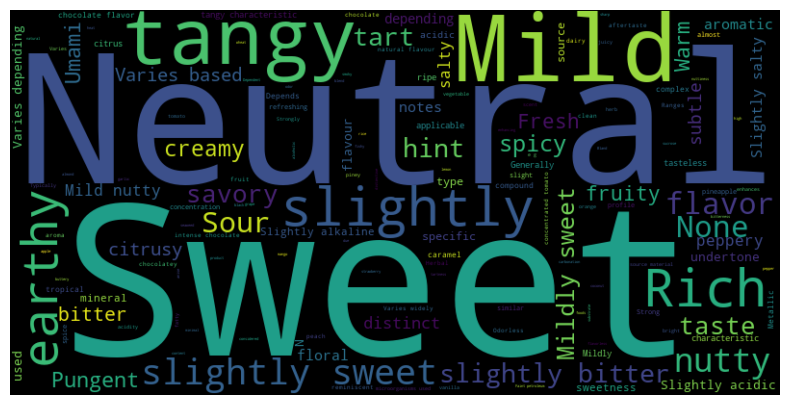

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_flavours(tx):
    query = """
    MATCH (tp:TasteProfile)
    WHERE tp.flavour IS NOT NULL
    RETURN tp.flavour AS Flavour
    """
    result = tx.run(query)
    return [record["Flavour"] for record in result if record["Flavour"] is not None]

with driver.session() as session:
    flavours = session.read_transaction(get_flavours)


flavours = [flavour for flavour in flavours if flavour is not None]

text = ' '.join(flavours)  
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(flavours)
feature_names = vectorizer.get_feature_names_out()


df = pd.DataFrame(X.toarray(), columns=feature_names)
flavour_counts = df.sum(axis=0).sort_values(ascending=False)

print(flavour_counts)


sweet       243
and         230
slightly    162
neutral     123
mild         95
           ... 
its           1
legume        1
lemon         1
lemons        1
yeasty        1
Length: 301, dtype: int64


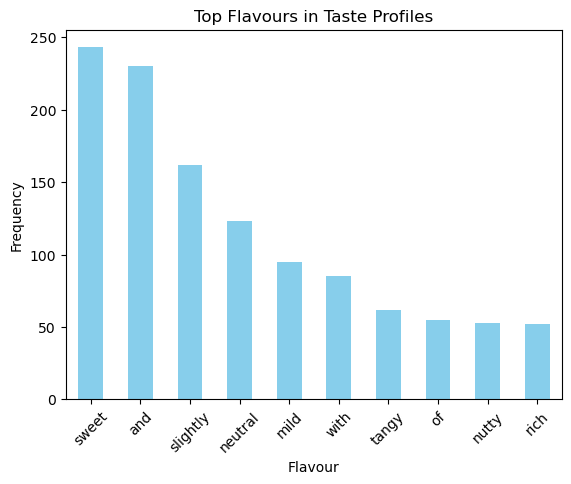

In [45]:
import matplotlib.pyplot as plt


flavour_counts.head(10).plot(kind='bar', color='skyblue')  
plt.title('Top Flavours in Taste Profiles')
plt.xlabel('Flavour')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [8]:
import plotly.graph_objects as go


fig = go.Figure(go.Bar(
    x=flavour_counts.index,  
    y=flavour_counts.values,  
    marker=dict(color='lightblue')  
))


fig.update_layout(
    title_text='Frequency of Each Flavour Type',  
    xaxis_title='Flavour',
    yaxis_title='Frequency',
     plot_bgcolor='white'  
)
   

fig.show()


In [10]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(flavours)  


labels = flavours  


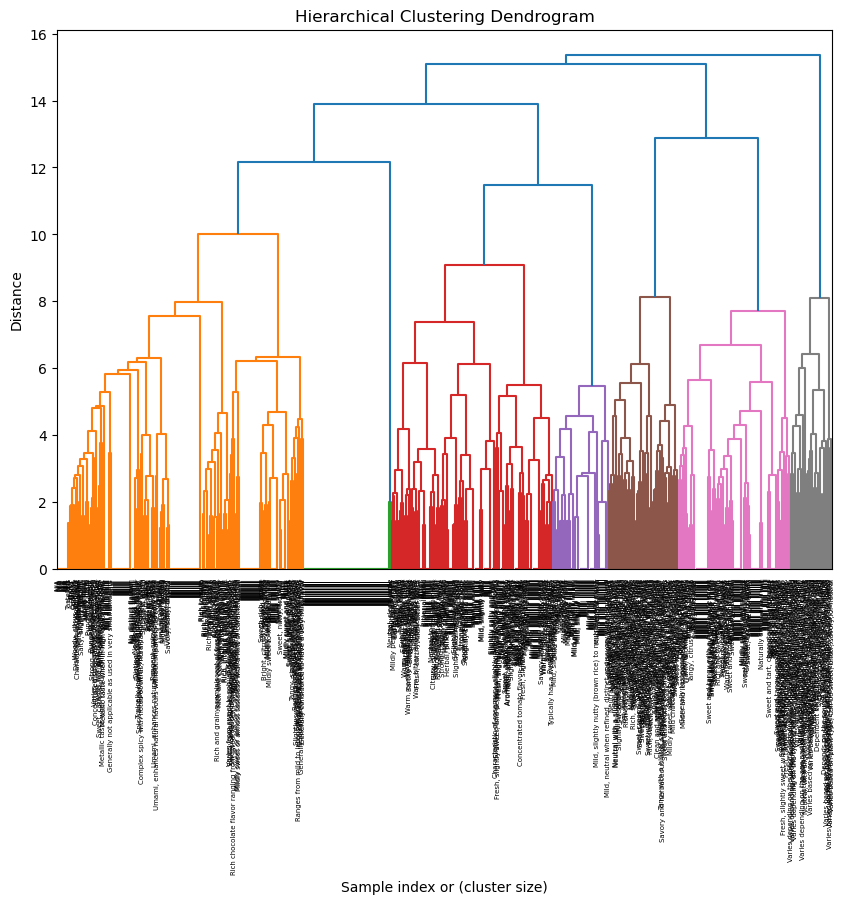

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linked = linkage(X.toarray(), 'ward')


assert len(labels) == X.shape[0], "The number of labels must match the number of instances in X."


plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labels,  
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flavours)  


similarity_matrix = cosine_similarity(tfidf_matrix)


In [16]:
from sklearn.manifold import MDS
import plotly.graph_objects as go


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(1 - similarity_matrix)  


fig = go.Figure(data=go.Scatter(x=mds_coords[:, 0], y=mds_coords[:, 1],
                                mode='markers+text',
                                text=vectorizer.get_feature_names_out(),
                                textposition="top center"))


fig.update_layout(
    title="MDS of Flavour Profiles",
    xaxis_title="MDS Dimension 1",
    yaxis_title="MDS Dimension 2",
    plot_bgcolor="white"
)

fig.show()


c:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



In [17]:
from neo4j import GraphDatabase


def get_textures(tx):
    query = """
    MATCH (tp:TasteProfile)
    WHERE tp.Texture IS NOT NULL
    RETURN tp.Texture AS Texture
    """
    result = tx.run(query)
    return [record["Texture"] for record in result if record["Texture"] is not None]

with driver.session() as session:
    textures = session.read_transaction(get_textures)


C:\Users\Wesle\AppData\Local\Temp\ipykernel_33204\3348544730.py:14: DeprecationWarning:

read_transaction has been renamed to execute_read



In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


text_data = ' '.join(textures)


tokens = word_tokenize(text_data)


stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]


print(lemmatized_tokens)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Wesle\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Smooth', ',', 'light', ',', 'bubbly', '.', 'Smooth', 'bubbly', 'Smooth', 'bubbly', 'Smooth', ',', 'light', ',', 'bubbly', 'noodle', 'chewy', ',', 'seasoning', 'powder', 'powdery', ',', 'seasoning', 'oil', 'oily', ',', 'sweet', 'soy', 'sauce', 'syrupy', ',', 'chilli', 'sauce', 'saucy', '.', 'fried', 'onion', 'crispy', '.', 'noodle', 'thin', 'springy', 'texture', '.', 'easy', 'chew', 'become', 'mushy', 'overcooked', '.', 'noodle', 'smooth', 'slightly', 'chewy', 'texture', '.', 'flavour', 'sachet', 'add', 'crunchy', 'texture', '.', 'noodle', 'soft', 'smooth', ',', 'flavor', 'sachet', 'slightly', 'powdery', 'texture', 'dissolve', 'soup', '.', 'Soft', 'noodle', 'slight', 'bite', 'tender', 'dehydrated', 'vegetable', 'noodle', 'smooth', 'slightly', 'chewy', ',', 'dehydrated', 'vegetable', 'offer', 'crunchy', 'texture', '.', 'Soft', 'slightly', 'chewy', 'noodle', 'crunch', 'fried', 'onion', 'piece', '.', 'noodle', 'soft', 'slightly', 'chewy', 'smooth', 'mouthfeel', '.', 'flavour', 'sachet', 

In [28]:
import plotly.express as px


word_freq = nltk.FreqDist(lemmatized_tokens)


fig = px.bar(x=list(word_freq.keys()), y=list(word_freq.values()), labels={'x': 'Texture Description', 'y': 'Frequency'}, title='Frequency of Texture Descriptions')
fig.show()



In [29]:
import pandas as pd

df_freq = pd.DataFrame(frequency_distribution.items(), columns=['Word', 'Frequency'])

df_freq_sorted = df_freq.sort_values(by='Frequency', ascending=False)

print(df_freq_sorted)


                  Word  Frequency
1                    ,         81
4                    .         70
29              smooth         42
23             texture         29
0               Smooth         24
..                 ...        ...
100               body          1
98         application          1
95   melt-in-the-mouth          1
92              center          1
181              syrup          1

[182 rows x 2 columns]


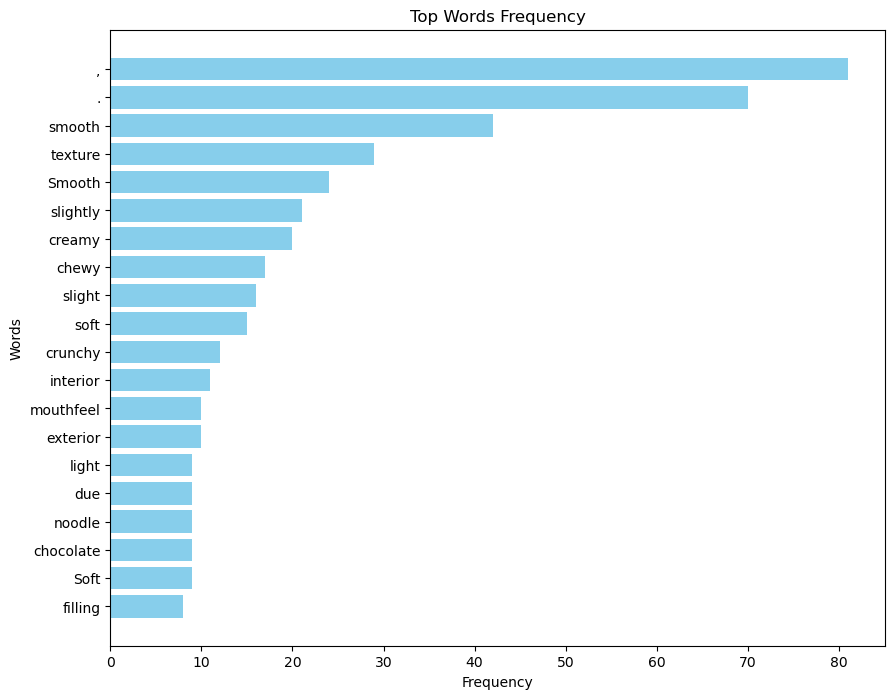

In [27]:
import matplotlib.pyplot as plt


top_n = 20
top_words = df_freq_sorted.head(top_n)


plt.figure(figsize=(10, 8))
plt.barh(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words Frequency')
plt.gca().invert_yaxis()  
plt.show()


In [68]:
from neo4j import GraphDatabase
import pandas as pd


def get_data(tx):
    query = """
    MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:HAS_TASTE_PROFILE]->(tp:TasteProfile)
    RETURN p.name AS ProductName, properties(tp) AS TasteProfileProperties
    """
    result = tx.run(query)
    # Extract data
    data = []
    for record in result:
        profile = record["TasteProfileProperties"]
        profile["ProductName"] = record["ProductName"]
        data.append(profile)
    return data

with driver.session() as session:
    data = session.read_transaction(get_data)

# Convert to DataFrame
df = pd.DataFrame(data)


C:\Users\Wesle\AppData\Local\Temp\ipykernel_33204\612377056.py:20: DeprecationWarning:

read_transaction has been renamed to execute_read



In [69]:
from sklearn.decomposition import LatentDirichletAllocation

# Creating LDA models
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(tfidf_matrix)

# Get and display the main vocabulary for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0:
the from flavor and of hint savory sweet tangy with
Topic 1:
milk cocoa slightly sweet taste flavour with and of tomato
Topic 2:
fruit slightly to milk onion sweet has and the tangy
Topic 3:
creamy rich chocolate sweet vanilla the buttery and with flavour
Topic 4:
and taste subtle with tangy sweet sweetness predominantly undertone dominant


In [71]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analysing the emotions described by each flavour
for description in text_data:
    print(description)
    print(sia.polarity_scores(description))


Sweet, tangy, and slightly spicy flavor with a hint of vanilla and caramel undertones.
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}
Classic cola taste with a sweet and slightly tangy note
{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}
Sweet, fizzy, and distinct cola taste
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
A sweet, fizzy cola flavor with a slight tang
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
The noodles have a savory flavor, the seasoning powder is sweet and savory, the seasoning oil is savory, the sweet soy sauce is sweet and savory, and the chilli sauce is spicy and savory. The fried onion is sweet and savory.
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9001}
The noodles have a savoury chicken flavour, thanks to the flavour enhancers and spices in the flavour mix sachet. The flavour is well-rounded and not overly salty.
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404}
The noodles have a savor

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
